# Matplotlib and Pandas

`Matplotlib` and `Pandas` are two very popular scientific libraries  

`Matplotlib` is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms  
`Pandas` is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

## Index

* [Matplotlib](matplotlib_pandas.ipynb#Matplotlib)
* [Pandas](matplotlib_pandas.ipynb#Pandas)
    * [Create a DataFrame](matplotlib_pandas.ipynb#Create-a-DataFrame)
    * [Read a file in pandas](matplotlib_pandas.ipynb#Read-a-file-in-pandas)
    * [Operations on a column](matplotlib_pandas.ipynb#Operations-on-a-column)
    * [Add a column to a DataFrame](matplotlib_pandas.ipynb#Add-a-column-to-a-DataFrame)
    * [Remove a column](matplotlib_pandas.ipynb#Remove-a-column)
    * [Save the DataFrame to a file](matplotlib_pandas.ipynb#Save-the-DataFrame-to-a-file)

## Matplotlib
[back to top](matplotlib_pandas.ipynb#Index)

The most convenient way to use matplotlib in a jupyter environment is to import the library in this way:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

This allow to display the generated plots directly in the notebook

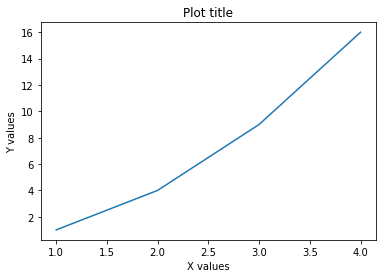

In [2]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
plt.plot(x, y)
plt.title('Plot title')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

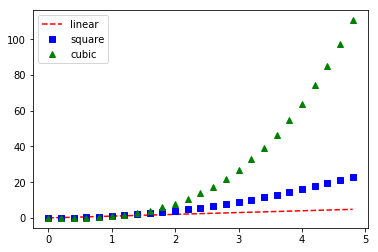

In [3]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0, 5, 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', label='linear') 
plt.plot(t, t ** 2, 'bs', label='square')
plt.plot(t, t ** 3, 'g^', label='cubic')

plt.legend()
plt.show()

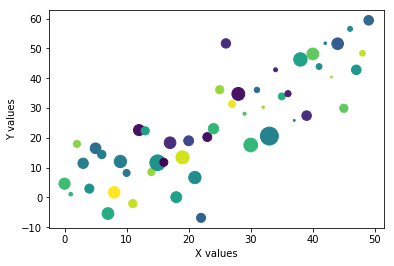

In [4]:
x = np.arange(50)
y = x + 10 * np.random.randn(50)
color = np.random.randint(0, 50, 50)
size = np.abs(np.random.randn(50)) * 100


plt.scatter(x, y, c=color, s=size)
plt.xlabel('X values')
plt.ylabel('Y values')

plt.show()

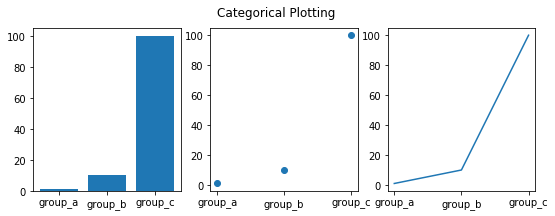

In [5]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)

plt.subplot(132)
plt.scatter(names, values)

plt.subplot(133)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

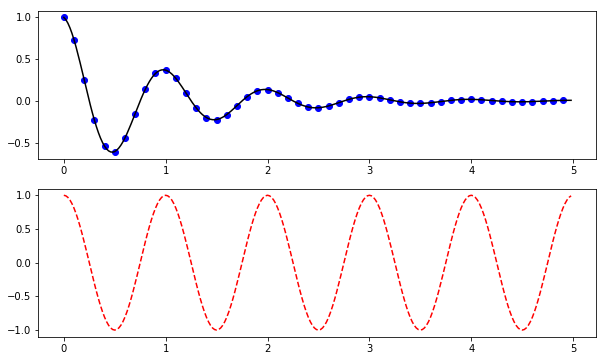

In [6]:
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(10, 6))

ax0 = plt.subplot2grid((2, 1), (0, 0))
ax1 = plt.subplot2grid((2, 1), (1, 0))

ax0.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
ax1.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.show()

## Pandas
[back to top](matplotlib_pandas.ipynb#Index)

In [7]:
import pandas as pd

### Create a DataFrame
[back to top](matplotlib_pandas.ipynb#Index)

In [8]:
df = pd.DataFrame({
    'a': range(10),
    'b': np.arange(0, 1, 0.1),
    'c': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'l'],
    'd': [True, True, False, False, True, True, True, False, False, True]
})

In [9]:
df

,a,b,c,d
0,0,0.0,a,True
1,1,0.1,b,True
2,2,0.2,c,False
3,3,0.3,d,False
4,4,0.4,e,True
5,5,0.5,f,True
6,6,0.6,g,True
7,7,0.7,h,False
8,8,0.8,i,False
9,9,0.9,l,True


In [10]:
df.head()

,a,b,c,d
0,0,0.0,a,True
1,1,0.1,b,True
2,2,0.2,c,False
3,3,0.3,d,False
4,4,0.4,e,True


In [11]:
df.tail()

,a,b,c,d
5,5,0.5,f,True
6,6,0.6,g,True
7,7,0.7,h,False
8,8,0.8,i,False
9,9,0.9,l,True


In [12]:
df.shape

(10, 4)

Rows and columns can be accessed as follow:

In [13]:
df['a']

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: a, dtype: int64

In [14]:
df.loc[2]

a        2
b      0.2
c        c
d    False
Name: 2, dtype: object

Each column has a data-type:

In [15]:
df.dtypes

a      int64
b    float64
c     object
d       bool
dtype: object

We can force a column to be a different compatible data-type:

In [16]:
df['a'] = df['a'].astype('float')

In [17]:
df.head()

,a,b,c,d
0,0.0,0.0,a,True
1,1.0,0.1,b,True
2,2.0,0.2,c,False
3,3.0,0.3,d,False
4,4.0,0.4,e,True


In [18]:
df.dtypes

a    float64
b    float64
c     object
d       bool
dtype: object

### Read a file in pandas
[back to top](matplotlib_pandas.ipynb#Index)

In [19]:
df = pd.read_csv('../data/yeast_genes_chrom2.txt', sep='\t', header=0)

In [20]:
df.shape

(40, 4)

In [21]:
df.head(3)

,Gene_name,Chromosome,Start,Stop
0,PAU9,2,7733,7605
1,SRO77,2,13879,10847
2,PKC1,2,17696,14241


In [22]:
df.dtypes

Gene_name     object
Chromosome     int64
Start          int64
Stop           int64
dtype: object

### Operations on a column
[back to top](matplotlib_pandas.ipynb#Index)

In [23]:
df['Chromosome'] += 1

In [24]:
df.head(3)

,Gene_name,Chromosome,Start,Stop
0,PAU9,3,7733,7605
1,SRO77,3,13879,10847
2,PKC1,3,17696,14241


### Add a column to a DataFrame
[back to top](matplotlib_pandas.ipynb#Index)

In [25]:
def derive_strand(line):
    """Derive the strand of genomic coordinates
    
    :param line: line of a pandas DataFrame
    :return: string, strand of the gene
    """
    
    if line['Start'] < line['Stop']:
        return '+'
    else:
        return '-'

In [26]:
df['Strand'] = df.apply(derive_strand, axis=1)

In [27]:
df.head(10)

,Gene_name,Chromosome,Start,Stop,Strand
0,PAU9,3,7733,7605,-
1,SRO77,3,13879,10847,-
2,PKC1,3,17696,14241,-
3,RTG3,3,23535,22075,-
4,SFT2,3,24098,24745,+
5,ECM21,3,28299,24946,-
6,ATP1,3,37050,38687,+
7,BNA4,3,39142,40524,+
8,BRN1,3,40828,43092,+
9,ROX3,3,44915,44253,-


### Remove a column
[back to top](matplotlib_pandas.ipynb#Index)

In [28]:
df['Chromosome'].unique()

array([3])

In [29]:
del df['Chromosome']

In [30]:
df.head(3)

,Gene_name,Start,Stop,Strand
0,PAU9,7733,7605,-
1,SRO77,13879,10847,-
2,PKC1,17696,14241,-


### Save the DataFrame to a file
[back to top](matplotlib_pandas.ipynb#Index)

In [31]:
df.to_csv('../data/yeast_genes_chrom2_strand.txt', sep='\t', header=True, index=False)